In [6]:
# Load needed packages
%matplotlib inline
import sys
sys.path.insert(0, '/weathradivan')
import weathradivan as rmet
import matplotlib.pyplot as plt
import numpy as np

In [89]:

frequency = 6.25E9 # Hz
pulse_width_min = 200E-9 # seconds
pulse_width_max = 2E-6 # seconds
beam_width = 0.9 # degrees
gain = 45.1 # dB
power = 350000 # W
prf_min = 200 # Hz
prf_max = 2.7E3 # Hz


# Let's make up a couple loss parameters
antenna_loss = 0.5 # dB
receiver_loss = 1.0 # dB

Text(0, 0.5, 'Range')

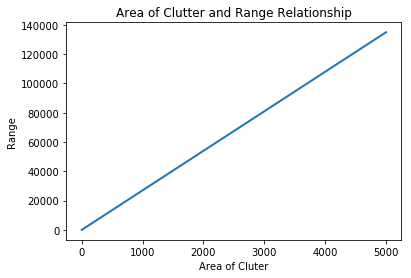

In [92]:
c=2.998e8
Rc=array = np.arange(5000)
Ac=c*pulse_width_min*beam_width*np.asarray(Rc)/2
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
line, = ax.plot(Rc,Ac, lw=2)

ax.set_title("Area of Clutter and Range Relationship")
ax.set_xlabel("Area of Cluter")
ax.set_ylabel("Range")

In [82]:
## Let's show some examples of radar system calculations ##
## system.py ## 
wavelength = rmet.system.wavelength(frequency) # m

pulse_length_min = rmet.system.pulse_length(pulse_width_min) # m

pulse_length_max = rmet.system.pulse_length(pulse_width_max) # m

radar_const = rmet.system.radar_const(power, gain, pulse_width_max,
                                      wavelength, beam_width, beam_width,
                                      antenna_loss, receiver_loss) # unitless

antenna_effective_area = rmet.system.ant_eff_area(gain, wavelength) # m^2

# Assume a spherical target of 0.5 mm diameter
targ_diam = 0.5E-3
targ_area = np.pi * (targ_diam/2)**2

# Target volume at 50 m range
targ_range = 50.
target_power = rmet.system.power_target(power, gain, targ_area, targ_range) # W

# Assume that it is water (don't need to specify dielectric constant, otherwise add K argument)
xsec_backscatter_sphere = rmet.system.xsec_bscatter_sphere(targ_diam, wavelength) # m^2

size_parameter = rmet.system.size_param(targ_diam, wavelength) # unitless

Pt_return = rmet.system.power_return_target(power, gain, wavelength,
                                            xsec_backscatter_sphere, targ_range) # W


In [90]:
 # Now print out the answers to check the performance:
print (" wavelength = %g cm" % (wavelength * 100)) # put into cm
print ("minimum pulse length = %g m" % (pulse_length_min))
print ("maximum pulse length = %g m" % (pulse_length_max))
print ("radar constant = %g" % radar_const)
print ("antenna effective area = %g m^2" % antenna_effective_area)
print ("target power return = %g W" % target_power)
print (r"crossectional backscatter area =%g m^2" % xsec_backscatter_sphere)
print ("parameter of example = %g " % size_parameter)
print (" power return for example = % g W" % Pt_return)

 wavelength = 4.8 cm
minimum pulse length = 30 m
maximum pulse length = 300 m
radar constant = 1.45312e+15
antenna effective area = 5.93298 m^2
target power return = 0.0707861 W
crossectional backscatter area =7.79059e-13 m^2
parameter of example = 0.0327249 
 power return for example =  5.30409e-11 W


For a distributed target such as precipitation, which fills the radar beam, the amount of power received by a given radar is summarized by the Probert-Jones equation for meteorological radar as follows,

                                             P_r  =P_t  (G^2 λ^2 θ_ϕ h)/(1024π^2 In2)  η/R^2                             (6)
                                              
where θ and ϕ denote the antenna beamwidth in the horizontal and vertical planes, h is the pulse length of the transmitted signal, and η is the radar reflectivity of the target. 
P_r is the average echo return power. It is to be noted that the Probert- Jones equation interpret average returned power, which is calculated from more than one pulse of energy. Averaging is necessary since P_r  varies greatly from pulse to pulse.
P_t  is the power transmitted from the in the outgoing energy burst. The average return power varies directly with P_r.
G is the gain of the radar antenna, being a measure of the ability of an antenna to focus energy into a beam for both the transmitted and received EM waves.
R is the range to target to the target and the reflected energy reaching the antenna varies inversely with the square of the target
λ is the wavelength of the RF energy expressed in meters. The amount of power received varies directly with square of the RF energy wavelength. 
The Probert-Jones equation assumes that the antenna pattern has a Gaussian shape and that the scattering volume is uniformly filled. From the equation above it can be noticed that power received from the target is directly proportional to the factor (η/R^2  ) of which is dependent on both the reflectivity of the target be it hailstorm or light rain as well as its range. However, of the two the range R can be determined by the equation,
                                               R_max=C/(2.PRF) ,                                                               (7)
where    R_max = is the maximum unambiguous range              
C = 3 x 108 m s^(-1)                  
PRF = pulse repetition frequency [s^(-1) ], i.e., number of pulses per second. So, dependant on the two elements of the factor it can be shown by equation (6) that the power received is inversely proportional to the range R calculated in equation (7). We can now tell the reflectivity Ƞ knowing the power received by the radar receiver through making it the subject of the formula in equation (6).  


In [7]:
## Converting units ##
print ("25 dBZ in linear units is %g" % rmet.conversion.dBZ2Z(25.))
print ("Wind speeds:")
print ("20 mph winds in SI units is %g m/s" % rmet.conversion.mph2si(20.))
print ("40 kmh winds in SI units is %g m/s" % rmet.conversion.kmh2si(40.))

25 dBZ in linear units is 316.228
Wind speeds:
20 mph winds in SI units is 8.94082 m/s
40 kmh winds in SI units is 11.1111 m/s


In [86]:

fmax_min = rmet.doppler.fmax(prf_min) # Hz
fmax_max = rmet.doppler.fmax(prf_max) # Hz
nyquist_vel_min = rmet.doppler.Vmax(prf_min, wavelength) # m/s
nyquist_vel_max = rmet.doppler.Vmax(prf_max, wavelength) # m/s
Rmax_min = rmet.doppler.Rmax(prf_min) # m
Rmax_max = rmet.doppler.Rmax(prf_max) # m

# Combining the two PRF for a dual-PRF system
nyquist_dual = rmet.doppler.Vmax_dual(wavelength, prf_min, prf_max) # m/s

In [87]:
# Now again print out the answers to the above cell to check the performance:
print ("max frequency for min PRF = %g Hz" % (fmax_min))
print ("max frequency for max PRF = %g Hz" % (fmax_max))
print ("nyquist velocity range = %g - %g m/s" % (nyquist_vel_min, nyquist_vel_max))
print ("unambiguous range for PRF range = %g - %g km" % (Rmax_min/1000., Rmax_max/1000.))
print ("dual PRF example = %g m/s" % nyquist_dual)

max frequency for min PRF = 100 Hz
max frequency for max PRF = 1350 Hz
nyquist velocity range = 2.4 - 32.4 m/s
unambiguous range for PRF range = 750 - 55.5556 km
dual PRF example = 2.592 m/s


Light to moderate


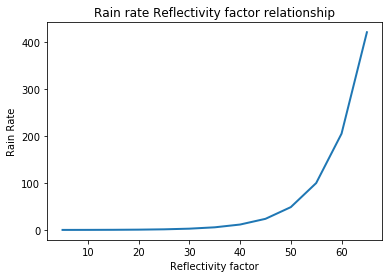

In [93]:
import random
l = [5,10,15,20,25,30,35,40,45,50,55,60,65]
rainrate = []
for i in range(0,len(l)):
    y= ((10**(l[i]/10))/200)**(5/8)
    rainrate.append(y)
#print(rainrate)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
line, = ax.plot(l ,rainrate, lw=2)

ax.set_title("Rain rate Reflectivity factor relationship")
ax.set_xlabel("Reflectivity factor")
ax.set_ylabel("Rain Rate")
#classify  categories of precipitation
x=random.randint(1,70)
if(x<5):
    print("Hardly noticeable")
elif(x<10):
    print("Light mist")
elif(x<15):
    print("mist")
elif(x<20):
    print("Very light")
elif(x<25):
    print("Light")
elif(x<30):
    print("Light to moderate")
elif(x<35):
    print("Moderate rain")
elif(x<40):
    print("Moderate rain")
elif(x<45):
    print("Moderate to heavy")
elif(x<50):
    print("Heavy")
elif(x<55):
    print("Very heavy/small hail")
elif(x<60):
    print("Extreme/moderate hail")
elif(x<65):
    print("Extreme/large hail")
else:
    print("Undefined")
    